## Step 1 : Import libraries

In [21]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Import File

In [57]:
filepath = r"C:\Users\welde\Documents\GitHub\AI-project\model\preprocessed_data\processed_train_en.tsv"
df = pd.read_csv(filepath, sep='\t')

## Step 3: Check about the dataframe
    

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sentence_id      830 non-null    object
 1   label            830 non-null    object
 2   solved_conflict  830 non-null    bool  
 3   sentence         830 non-null    object
dtypes: bool(1), object(3)
memory usage: 20.4+ KB


In [10]:
df['sentence'] = df['sentence'].str.lower()
# Lowercasing: Convert all text to lowercase to avoid treating words like "News" and "news" as different tokens

In [ ]:
import re

# Remove Punctuation and Special Characters: Stripping unnecessary characters that don't carry meaning (commas, exclamation points, etc.)
df['sentence'] = df['sentence'].apply(lambda x: re.sub(r'[^\w\s]', '', x))


In [39]:
# to display the first five and the last twenty of the dataframe dataset, we use .tail(), .tail(20)
df.head(), df.tail(20)

(                            sentence_id label  solved_conflict  \
 0  b9e1635a-72aa-467f-86d6-f56ef09f62c3  SUBJ             True   
 1  f99b5143-70d2-494a-a2f5-c68f10d09d0a   OBJ            False   
 2  4076639c-aa56-4202-ae0f-9d9217f8da68   OBJ            False   
 3  b057c366-698e-419d-a284-9b16d835c64e   OBJ            False   
 4  a5a9645e-7850-41ba-90a2-5def725cd5b8  SUBJ            False   
 
                                             sentence  word_count  \
 0   ['go', 'day', 'lead', 'world', 'recessionbuste']          48   
 1    ['trend', 'expect', 'reverse', 'soon', 'month']          47   
 2                              ['specious', 'point']          21   
 3  ['add', 'not', 'surprised', 'new', 'variant', ...          67   
 4              ['government', 'government', 'money']          37   
 
    label_encoded                                      sentence_text  
 0              1  [ ' g o ' ,   ' d a y ' ,   ' l e a d ' ,   ' ...  
 1              0  [ ' t r e n d ' ,  

# word frequency plot

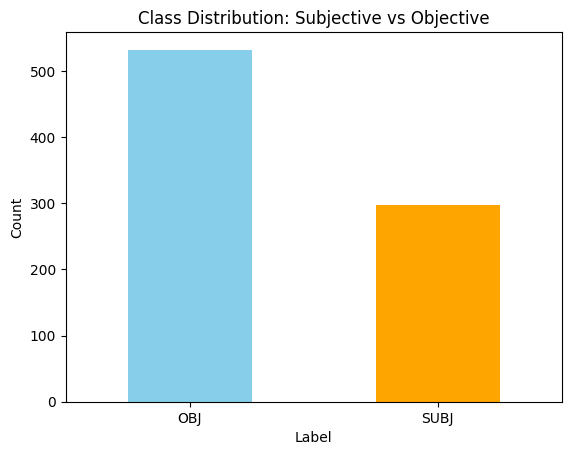

In [27]:
import matplotlib.pyplot as plt

# Count the number of SUBJ and OBJ
class_counts = df['label'].value_counts()

# Plot
class_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution: Subjective vs Objective')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


C:\Users\welde\AppData\Local\Temp\ipykernel_13360\1572775024.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['label'] == 'SUBJ']['word_count'], label='SUBJ', shade=True)
C:\Users\welde\AppData\Local\Temp\ipykernel_13360\1572775024.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['label'] == 'OBJ']['word_count'], label='OBJ', shade=True)


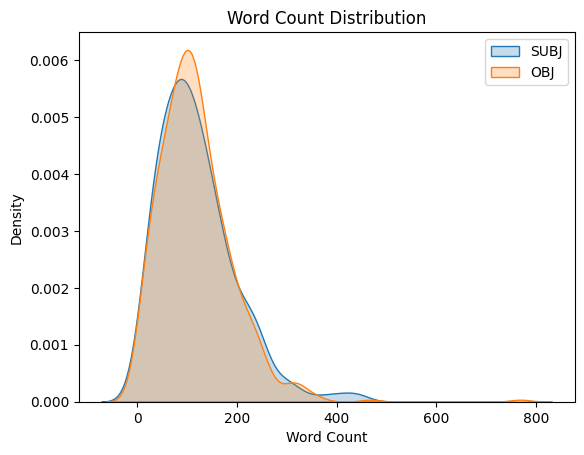

In [28]:
import seaborn as sns

# Count the number of tokens in each sentence
df['word_count'] = df['sentence'].apply(len)

# Plot KDE
sns.kdeplot(df[df['label'] == 'SUBJ']['word_count'], label='SUBJ', shade=True)
sns.kdeplot(df[df['label'] == 'OBJ']['word_count'], label='OBJ', shade=True)
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.legend()
plt.show()


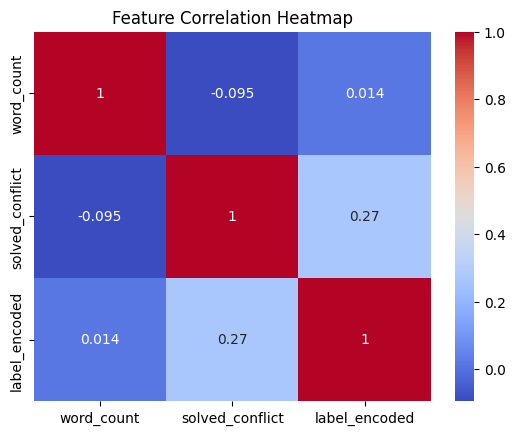

In [30]:
import seaborn as sns

# Encode label column as 0 (OBJ) and 1 (SUBJ)
df['label_encoded'] = df['label'].apply(lambda x: 1 if x == 'SUBJ' else 0)

# Select numerical columns for correlation
correlation_matrix = df[['word_count', 'solved_conflict', 'label_encoded']].corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [44]:
# Function to clean tokens
def clean_tokens(tokens):
    # Keep tokens that are alphabetic and longer than 1 character
    return [token for token in tokens if token.isalpha() and len(token) > 1]

# Apply the cleaning function to the sentence column
df['sentence'] = df['sentence'].apply(clean_tokens)

# Verify the cleaned tokens
print(df['sentence'].head())


0    []
1    []
2    []
3    []
4    []
Name: sentence, dtype: object


In [50]:
# Remove rows with empty lists
#df = df[df['sentence'].apply(lambda x: len(x) > 0)]

# Verify that rows with non-empty sentences remain
print(df['sentence'].head())
print(len(df))  # Check the number of rows remaining


0     ['go', 'day', 'lead', 'world', 'recessionbuste']
1      ['trend', 'expect', 'reverse', 'soon', 'month']
2                                ['specious', 'point']
3    ['add', 'not', 'surprised', 'new', 'variant', ...
4                ['government', 'government', 'money']
Name: sentence, dtype: object
830


In [59]:
# Check the structure of the first few rows of 'sentence'
print(type(df['sentence'].iloc[0]))  # Should print <class 'list'>
print(df['sentence'].iloc[0])        # Should print something like ['go', 'day', 'lead', 'world', 'recessionbuster']


<class 'str'>
['go', 'day', 'lead', 'world', 'recessionbuste']


In [60]:
import ast

# Convert the string representation of lists into actual lists
df['sentence'] = df['sentence'].apply(ast.literal_eval)

# Verify the conversion
print(type(df['sentence'].iloc[0]))  # Should now print <class 'list'>
print(df['sentence'].iloc[0])       # Should print ['go', 'day', 'lead', 'world', 'recessionbuster']


<class 'list'>
['go', 'day', 'lead', 'world', 'recessionbuste']


## TF-IDF Vectorization

c:\Users\welde\miniconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


            Word      Score
1302  government  22.178370
2764       state  13.441971
3211        year  11.165693
1947         new  10.937593
2307      public  10.457957
2555         say  10.089686
2877     teacher   9.543416
1700        like   8.002747
687         cost   8.002593
1475    increase   7.923875


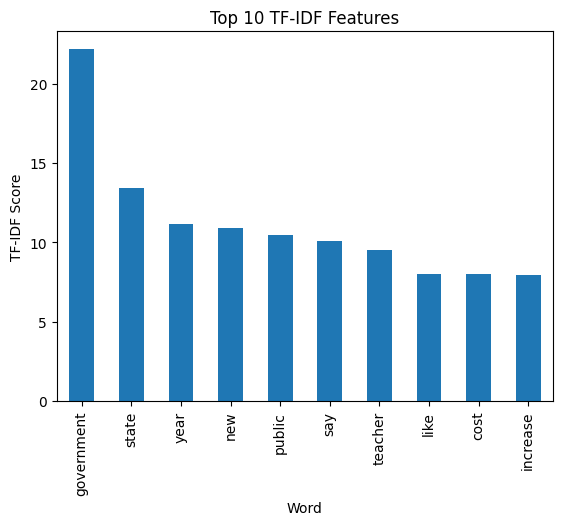

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt

# Define an identity tokenizer for pre-tokenized input
def identity_tokenizer(text):
    return text

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(
    tokenizer=identity_tokenizer,  # Use the pre-tokenized input
    lowercase=False,               # Data is already clean
    stop_words=None                # Stop words are already handled
)

# Fit and transform the tokenized data
X_tfidf = tfidf.fit_transform(df['sentence'])

# Extract and visualize TF-IDF scores
tfidf_scores = pd.DataFrame({
    'Word': tfidf.get_feature_names_out(),
    'Score': X_tfidf.toarray().sum(axis=0)
})

# Sort and display the top words
top_words = tfidf_scores.sort_values(by='Score', ascending=False).head(10)
print(top_words)

# Plot the results
top_words.plot(kind='bar', x='Word', y='Score', legend=False)
plt.title('Top 10 TF-IDF Features')
plt.ylabel('TF-IDF Score')
plt.xlabel('Word')
plt.show()


# most frequent words 

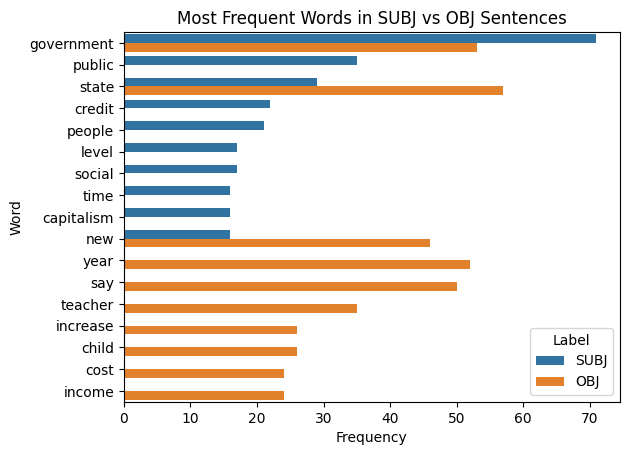

In [62]:
from collections import Counter
import pandas as pd

# Extract tokens from SUBJ and OBJ
subj_words = [word for tokens in df[df['label'] == 'SUBJ']['sentence'] for word in tokens]
obj_words = [word for tokens in df[df['label'] == 'OBJ']['sentence'] for word in tokens]

# Count top 10 words
subj_word_counts = Counter(subj_words).most_common(10)
obj_word_counts = Counter(obj_words).most_common(10)

# Create DataFrame for plotting
word_freq_df = pd.DataFrame({
    'Word': [x[0] for x in subj_word_counts + obj_word_counts],
    'Frequency': [x[1] for x in subj_word_counts + obj_word_counts],
    'Label': ['SUBJ'] * len(subj_word_counts) + ['OBJ'] * len(obj_word_counts)
})

# Plot
import seaborn as sns
sns.barplot(data=word_freq_df, x='Frequency', y='Word', hue='Label')
plt.title('Most Frequent Words in SUBJ vs OBJ Sentences')
plt.show()
